# Classification 

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Create dataframe with columns sepal_length, sepal_width, petal_length, petal_width corresponding to X; column species_id corresponding to Y

In [20]:
df = pd.DataFrame(data = {"sepal_length" : X[ : , 0], "sepal_width" : X[ : , 1] , "petal_length" : X[ : , 2] , "petal_width" : X[ : , 3], "species_id" : Y})
df

,sepal_length,sepal_width,petal_length,petal_width,species_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Create column “species_name” which will provide the name of the species which we are trying to predict. <br>(0->setosa, 1->versicolor, 2->virginica)

In [21]:
df["species_name"] = iris.target_names[Y]
df

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Shuffle the dataset

In [16]:
df = shuffle(df)
df

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
147,6.5,3.0,5.2,2.0,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
117,7.7,3.8,6.7,2.2,2,virginica
63,6.1,2.9,4.7,1.4,1,versicolor
105,7.6,3.0,6.6,2.1,2,virginica
...,...,...,...,...,...,...
55,5.7,2.8,4.5,1.3,1,versicolor
111,6.4,2.7,5.3,1.9,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa
39,5.1,3.4,1.5,0.2,0,setosa


### Describe the data for each individual species

### Use different features to make scatter plots and see if those features will work for classification

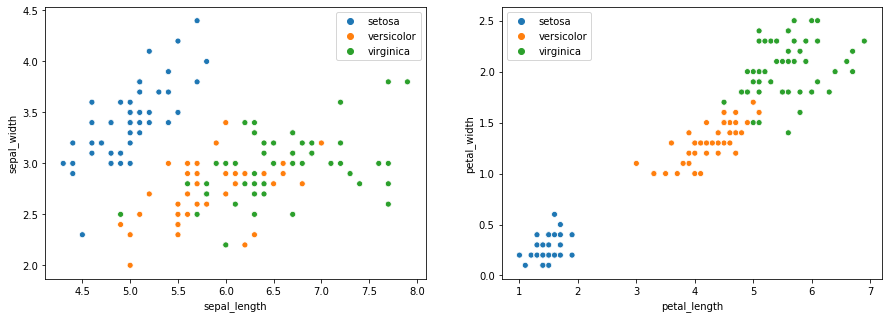

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].set_xlabel("sepal_length")
axes[0].set_ylabel("sepal_width")
sns.scatterplot(sepal_length, sepal_width, hue = iris.target_names[Y], ax = axes[0]);

axes[1].set_xlabel("petal_length")
axes[1].set_ylabel("petal_width")
sns.scatterplot(petal_length, petal_width, hue = iris.target_names[Y], ax = axes[1]);

### Use one-vs-all technique: create corresponding target vectors

### Create logistic regression and svm classifications models

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 64)

In [14]:
model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [15]:
classifier = SVC()
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Sum up the results